In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as pb
import seaborn as sns

In [2]:
import os
os.chdir("D:\DM")

In [3]:
df = pd.read_csv('Mall_Customers.csv', sep=',', header=0,index_col=0)

In [4]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
df.info

<bound method DataFrame.info of              Genre  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]>

In [6]:
print(df.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [7]:
print(df.index)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='CustomerID', length=200)


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.isnull()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
df.fillna

<bound method DataFrame.fillna of              Genre  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]>

In [12]:
#1genre male w 0 femal
Genre_dummies= pd.get_dummies(df.Genre, prefix='Genre')
df=pd.concat([df, Genre_dummies], axis=1)
df.drop('Genre',axis=1, inplace=True)
df.drop('Genre_Female',axis=1, inplace=True)

In [13]:
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
df['Genre_Male'] = trans.fit_transform(df['Genre_Male'].values.reshape(-1, 1))

In [15]:
from sklearn.cluster import KMeans

In [16]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X_numerics) # initialise and fit K-Means model
KM4_clustered = X_numerics.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_ # append labels to points

D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


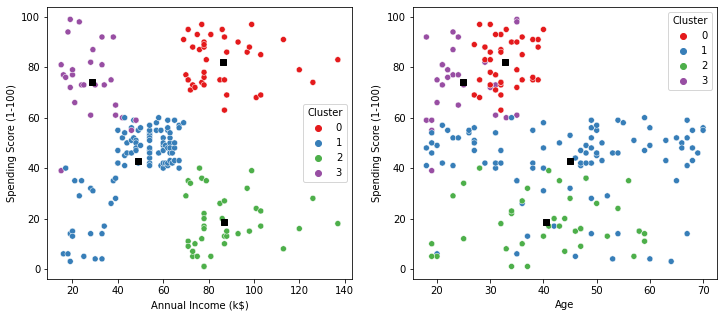

In [18]:
import matplotlib.pyplot as plt
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM4_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_4_clusters.cluster_centers_[:,1],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="black")
axes[1].scatter(KM_4_clusters.cluster_centers_[:,0],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="black")
plt.show()

In [19]:
KM_clust_sizes = KM4_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,95
2,38
3,28


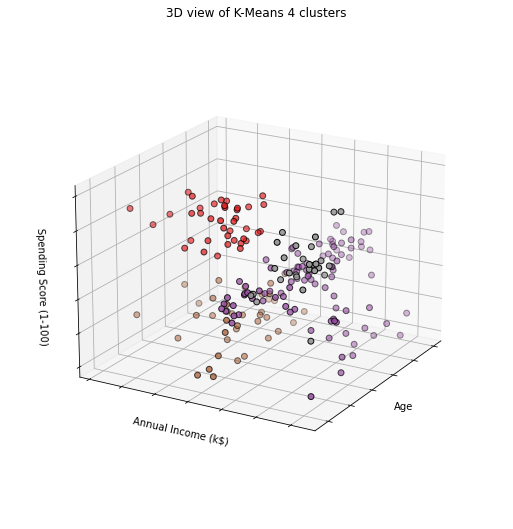

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM4_clustered['Age'],
           KM4_clustered['Annual Income (k$)'],
           KM4_clustered['Spending Score (1-100)'],
           c=KM4_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 4 clusters')
ax.dist = 12

plt.show()

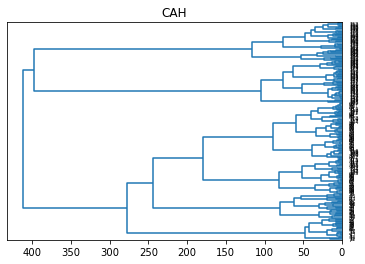

In [21]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
Z = linkage(df,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(Z,orientation='left',color_threshold=0)
plt.show()


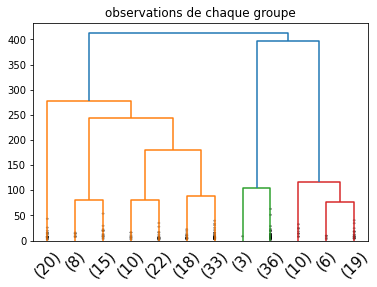

[ 40   6  37   4  39   4  35   3  21   9  19   1  20   5  36   5  38  10
  34   2  38   7  26   8  24  17  32  48  33  18  22  13  23  15  25  11
  30  14  31  12  29  16  27  46  28  47  80  42  41  41  79  46  43  81
  83  85  79  78  44  84  75  50  76  82  72  49  89  77  49  45  75  86
  73  74  70  51  90  91  51  88  71  95  69  87  52  87  94  52  96 104
  64  60 103  99 100  53 103  53 105  62  59 103  65  54  93  59  66 101
  67  66  66  63  98  61  61  61  68  92 102  92  55  98  97 123  56 113
 156 124 168 109 170 109  57 111 152 128 171 111 153 112 169 132  58 130
 154 126 157 110 164 131 172 125 172 116 173 129 151 114 151 110 158 115
 155 127 159 117 162 133 163 122 160 120 161 134 167 135 165 121 166 136
 144 137 146 137 145 139 149 118 147 138 148 119 150 140 141 106 142 107
 143 108]
     CustomerID
1            12
2            20
3             8
4             4
4             6
..          ...
170         131
171         137
172         153
172         151
173        

In [22]:
plt.title('observations de chaque groupe')

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15,show_contracted=True)
plt.show()

groupes_cah = fcluster(Z,t=4,criterion='distance')
print(groupes_cah)

import numpy as np
idg = np.argsort(groupes_cah)

print(pd.DataFrame(df.index[idg],groupes_cah[idg]))

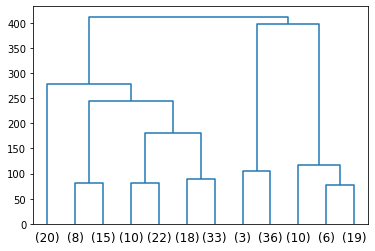

In [23]:
from sklearn.cluster import AgglomerativeClustering
modelAgglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering = modelAgglomerative.fit(df)
dendrogram(Z, truncate_mode='lastp', p=12,orientation='top',color_threshold=3)
plt.show()

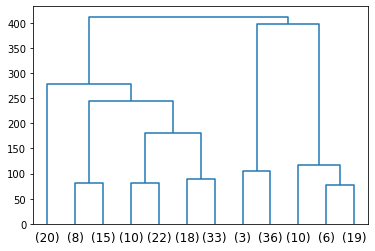

In [24]:
from sklearn.cluster import AgglomerativeClustering
modelAgglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering = modelAgglomerative.fit(df)
dendrogram(Z, truncate_mode='lastp', p=12,orientation='top',color_threshold=3)
plt.show()

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [27]:
#esp=diam et min=cluster
DBS_clustering = DBSCAN(eps=10, min_samples=5).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [28]:
#connaitre ls voisins ds chq clusters
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,69
0,15
1,79
2,32
3,5


D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


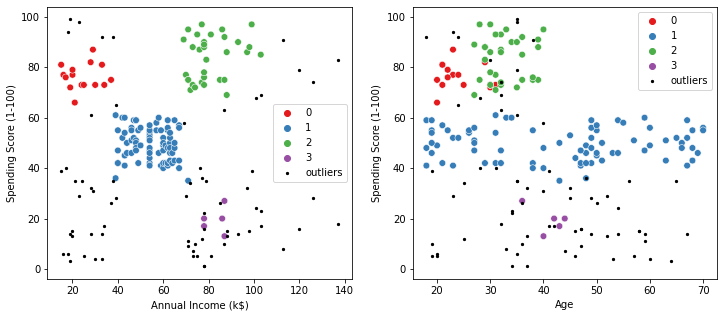

In [29]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="black")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="black")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [30]:
#sil pr connaitre le meilleur K 
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [31]:
from sklearn.metrics import silhouette_score 
import sklearn.cluster as cluster

resKM=np.arange(7,dtype="double")
for k in np.arange(7):
    modelKM_1=KMeans(n_clusters=k+2).fit(df)
    resKM[k]=silhouette_score(df,modelKM_1.labels_)
print(resKM)

[0.29307334 0.38379887 0.40553487 0.4402373  0.45205475 0.44096463
 0.42782389]


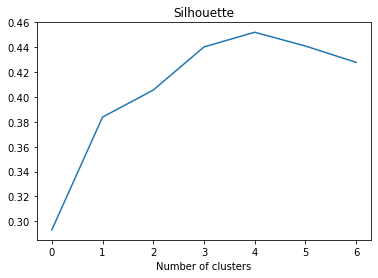

In [32]:
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(0,7,1),resKM)  
plt.show()

D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


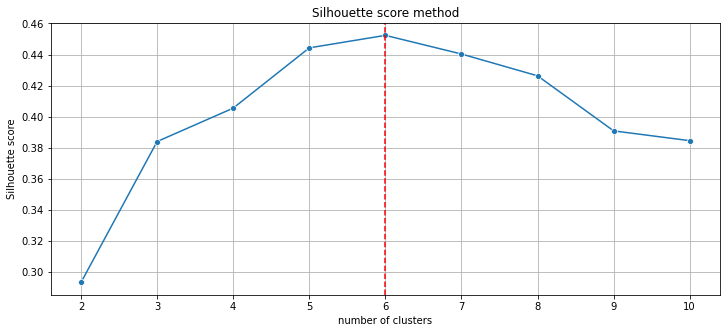

In [33]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()
#6=clusters

D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


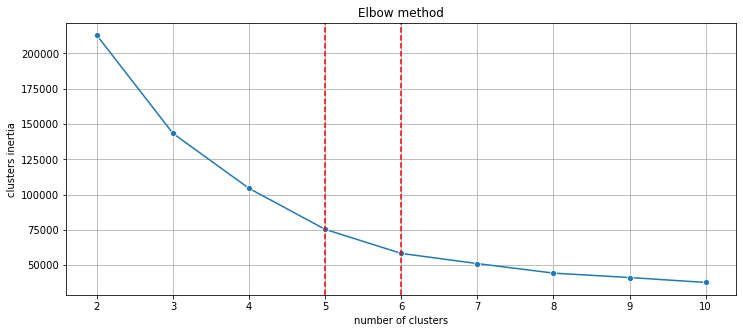

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [35]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\DM\DV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


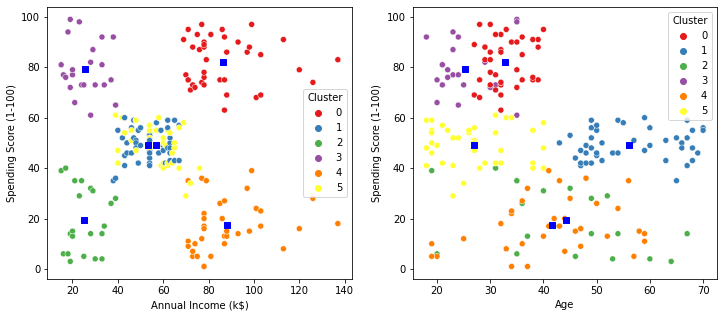

In [36]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()


In [37]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,39
1,45
2,21
3,22
4,35
5,38


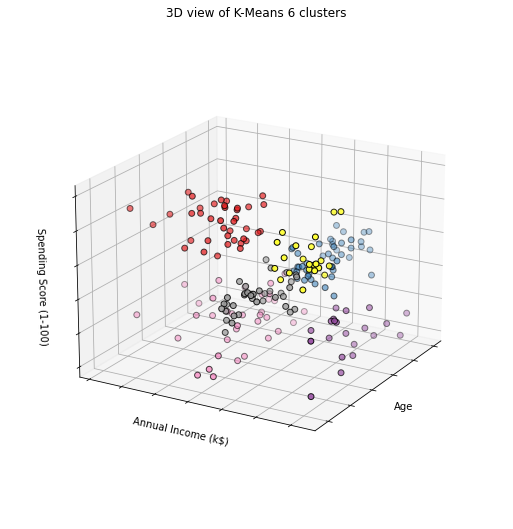

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM6_clustered['Age'],
           KM6_clustered['Annual Income (k$)'],
           KM6_clustered['Spending Score (1-100)'],
           c=KM6_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 6 clusters')
ax.dist = 12

plt.show()

In [39]:
#Make MOONS 

In [40]:
from sklearn.datasets import make_moons,make_circles
import numpy as np
from matplotlib import pyplot as plt

In [41]:
p,q=make_moons(n_samples=200,noise=0.1)

No handles with labels found to put in legend.


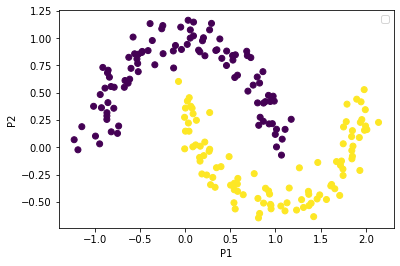

In [42]:
plt.scatter(p[:,0],p[:,1],c=q,)
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend()
plt.show()

In [43]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(p)
centers=km.cluster_centers_
label=km.labels_

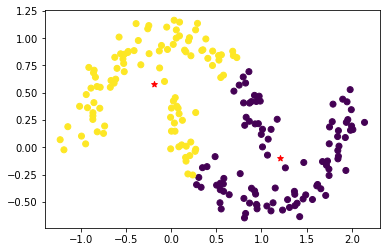

In [44]:
plt.scatter(p[:,0],p[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color="red",marker="*")
plt.show()
# as we can see its preety bad 

In [45]:
p,q=make_circles(n_samples=1000,noise=0.1)

No handles with labels found to put in legend.


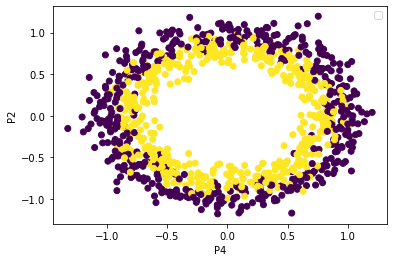

In [46]:
plt.scatter(p[:,0],p[:,1],c=q,)
plt.xlabel("P4")
plt.ylabel("P2")
plt.legend()
plt.show()

In [47]:
p,q=make_moons(n_samples=800,noise=0.1)

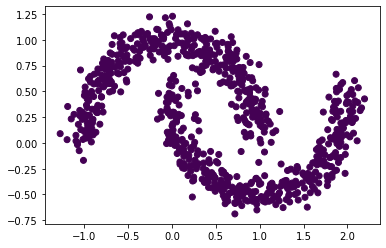

In [48]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.18,min_samples=2)
dbs.fit(p)
ypred=dbs.fit_predict(p)
plt.scatter(p[:,0],p[:,1],c=ypred)
plt.show()

In [49]:
p,q=make_circles(n_samples=800,noise=0.1)

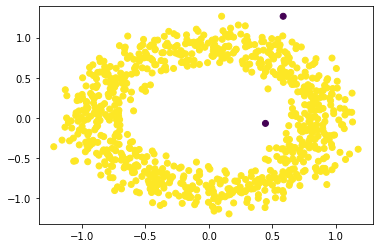

In [50]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.18,min_samples=2)
dbs.fit(p)
ypred=dbs.fit_predict(p)
plt.scatter(p[:,0],p[:,1],c=ypred)
plt.show()

In [51]:
from bokeh.io import output_file, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [52]:
output_file('filename.html')

In [53]:
output_notebook()

Loading BokehJS ...

In [54]:
fig = figure(background_fill_color='gray',
             background_fill_alpha=0.5,
             border_fill_color='blue',
             border_fill_alpha=0.25,
             plot_height=300,
             plot_width=500,
            
             x_axis_label='X Label',
             x_axis_type='datetime',
             x_axis_location='above',
             x_range=('2018-01-01', '2018-06-30'),
             y_axis_label='Y Label',
             y_axis_type='linear',
             y_axis_location='left',
             y_range=(0, 100),
             title='Example Figure',
             title_location='right',
             toolbar_location='below',
             tools='save')

# See what it looks like
show(fig)

In [55]:
source=ColumnDataSource(df)

In [56]:
plot1 = figure(x_axis_label='Age', y_axis_label='Annual Income (k$)',
title="Plot 1 des survivants en fct de l'age ",
plot_width=300,plot_height=300)
plot1.circle('Age','Annual Income (k$)',source=source,alpha=0.8, color='olive')
show(plot1)

In [57]:
plot1 = figure(x_axis_label='Age', y_axis_label='Annual Income (k$)',
title="Plot 1 des survivants en fct de l'age ",
plot_width=300,plot_height=300)
plot1.patch('Age','Annual Income (k$)',source=df,alpha=0.8, color='olive')
show(plot1)

In [58]:
plot1 = figure(x_axis_label='Age', y_axis_label='Annual Income (k$)',
title="Plot 1 des survivants en fct de l'age ",
plot_width=300,plot_height=300)
plot1.line('Age','Annual Income (k$)',source=df,alpha=0.8, color='olive')
show(plot1)

In [59]:
plot1 = figure(x_axis_label='Age', y_axis_label='Spending Score (1-100)',
title="Plot 1 des survivants en fct de l'age ",
plot_width=300,plot_height=300)
plot1.line('Age','Spending Score (1-100)',source=df,alpha=0.8, color='yellow')
show(plot1)